<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/Startup_Success_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
!pip install category_encoders
!pip install autoviz

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import L1,L2



In [131]:
data = pd.read_csv('data.csv', encoding = "ISO-8859-1")
data.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video di

In [132]:
from autoviz import data_cleaning_suggestions
data_cleaning_suggestions(data)
%matplotlib inline

    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Company_Name,object,0.000000,100,,,Possible ID column: drop before modeling step.
Dependent-Company Status,object,0.000000,0,,,No issue
year of founding,object,0.000000,3,,,"6 rare categories: ['2000', '2002', '2003', '2004', '1999', '1997']. Group them into a single category or drop the categories."
Age of company in years,object,9.322034,3,,,"44 missing values. Impute them with mean, median, mode, or a constant value such as 123., 6 rare categories: ['14', '12', '11', '10', '15', '17']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
Internet Activity Score,float64,13.771186,NA,-725.000000,1535.000000,"65 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 22 outliers greater than upper bound (545.25) or lower than lower bound(-332.75). Cap them or remove them."
Short Description of company profile,object,31.567797,66,,,"149 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 313 unique values: Use hash encoding or text embedding to reduce dimension."
Industry of company,object,26.271186,40,,,"124 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,, Possible high cardinality column with 192 unique values: Use hash encoding or text embedding to reduce dimension."
Focus functions of company,object,6.355932,34,,,"30 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 164 unique values: Use hash encoding or text embedding to reduce dimension."
Investors,object,29.661017,67,,,"140 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,, Possible high cardinality column with 319 unique values: Use hash encoding or text embedding to reduce dimension."
Employee Count,float64,35.169492,NA,0.000000,594.000000,"166 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 30 outliers greater than upper bound (71.12) or lower than lower bound(-35.88). Cap them or remove them."


<Axes: xlabel='Dependent-Company Status', ylabel='count'>

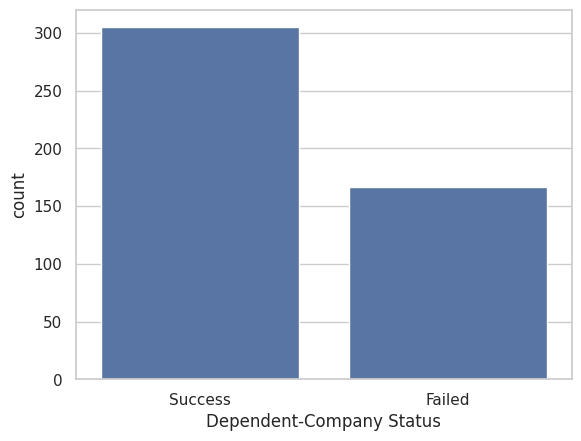

In [133]:
sns.countplot(x='Dependent-Company Status', data=data)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Columns: 116 entries, Company_Name to Renown score
dtypes: float64(5), int64(3), object(108)
memory usage: 427.9+ KB


In [135]:
data.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,407.000000,306.000000,267.000000,3.120000e+02,472.000000,472.000000,472.000000,390.000000
mean,114.159705,31.408497,-1.299625,6.379489e+06,1.868644,1.016949,3.730932,2.889744
std,225.651419,62.673600,23.967085,9.901622e+06,1.143481,2.014736,2.516539,0.845765
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,-3.500000,4.250000,0.000000,7.500000e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,13.000000,0.000000,2.800000e+06,2.000000,0.000000,3.000000,3.000000
75%,216.000000,31.000000,6.000000,7.850000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


In [136]:
for i in data.columns:
    if data[i].isnull().any():
        nullperc = data[i].isnull().sum()/data.shape[0] * 100
        print(f'null percentage of {i} is {round(nullperc,ndigits=3)}')

null percentage of Age of company in years is 9.322
null percentage of Internet Activity Score is 13.771
null percentage of Short Description of company profile is 31.568
null percentage of Industry of company is 26.271
null percentage of Focus functions of company is 6.356
null percentage of Investors is 29.661
null percentage of Employee Count is 35.169
null percentage of Employees count MoM change is 43.432
null percentage of Has the team size grown is 10.593
null percentage of Est. Founding Date is 23.093
null percentage of Last Funding Date is 25.847
null percentage of Last Funding Amount is 33.898
null percentage of Country of company is 15.042
null percentage of Continent of company is 15.042
null percentage of Specialization of highest education is 20.551
null percentage of Industry trend in investing is 17.373
null percentage of Gartner hype cycle stage is 36.441
null percentage of Time to maturity of technology (in years) is 36.441


# Data Processing

In [137]:
Y = data['Dependent-Company Status']
Y = Y.apply(lambda x: [0, 1] if x == 'Failed' else [1, 0])
Y = np.array(Y.tolist())

In [138]:
useless_columns = [
    #####################################
    #'Short Description of company profile',
    #'Investors',
    #'Industry of company', 'Focus functions of company', not deleting this columns gives me better result
    #####################################
                   'Dependent-Company Status',
                   'Company_Name',
                   'Est. Founding Date',
                   'year of founding',
                   'Last Funding Date',
                   'Continent of company',
                #'Number of Investors in Angel and or VC',
                #'Number of of repeat investors',
                   'Presence of a top angel or venture fund in previous round of investment',
                #'Crowdsourcing based business',
                #'Crowdfunding based business',
                #"Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",
                   'Specialization of highest education',
                   'Relevance of education to venture',
                   'Relevance of experience to venture',
                   'Degree from a Tier 1 or Tier 2 university?',
                   'Renowned in professional circle',
                   'Experience in selling and building products',
                   'Experience in Fortune 100 organizations',
                   'Experience in Fortune 500 organizations',
                   'Experience in Fortune 1000 organizations',
                   'Top management similarity',
                #'Number of Recognitions for Founders and Co-founders',
                #'Number of of Research publications',
                #'Skills score',
                   'Invested through global incubation competitions?',
                   'Industry trend in investing',
                   'Disruptiveness of technology',
    'Time to maturity of technology (in years)',
    'Gartner hype cycle stage',
    'Last Funding Amount',
    'Employees count MoM change',

    #'Number of of advisors',
    #'Gartner hype cycle stage',
    #'Time to maturity of technology (in years)',

                  ]
data = data.drop(useless_columns, axis=1)
data.replace('No Info', np.nan, inplace=True)

In [139]:
obj_columns = data.select_dtypes(include=['object']).columns

In [140]:
#getting numerical and categorical columns from columns of type 'object'

def is_numeric(s):
    try:
        float(s)
        return True and not s != s
    except ValueError:
        return False

num_columns = []
cat_columns = []

for obj_curr_column in obj_columns:

  if any(is_numeric(val) for val in data[obj_curr_column] ):
    num_columns.append(obj_curr_column)
  else:
    cat_columns.append(obj_curr_column)

num_columns.extend(data.select_dtypes(include=['float64']).columns)

In [141]:
num_columns

['Age of company in years',
 'Number of Investors in Seed',
 'Number of Investors in Angel and or VC',
 'Team size all employees',
 'Number of of repeat investors',
 'Years of education',
 'Number of Recognitions for Founders and Co-founders',
 'Skills score',
 'google page rank of company website',
 'Number of Direct competitors',
 'Employees per year of company existence',
 'Last round of funding received (in milionUSD)',
 'Time to 1st investment (in months)',
 'Avg time to investment - average across all rounds, measured from previous investment',
 'Percent_skill_Entrepreneurship',
 'Percent_skill_Operations',
 'Percent_skill_Engineering',
 'Percent_skill_Marketing',
 'Percent_skill_Leadership',
 'Percent_skill_Data Science',
 'Percent_skill_Business Strategy',
 'Percent_skill_Product Management',
 'Percent_skill_Sales',
 'Percent_skill_Domain',
 'Percent_skill_Law',
 'Percent_skill_Consulting',
 'Percent_skill_Finance',
 'Percent_skill_Investment',
 'Renown score',
 'Internet Activ

In [142]:
columns_to_handle_nan_to_zero = [*num_columns[0:2], *num_columns[6:12], *num_columns[13:17], *num_columns[18:-4]]
columns_to_handle_nan_to_median = [*num_columns[2:6], *num_columns[-4:], num_columns[12], num_columns[17]]

In [143]:
#handling NaN's
data.loc[:, columns_to_handle_nan_to_zero] = data[columns_to_handle_nan_to_zero].replace({'No Info': 0, np.nan: 0, 'unknown amount': 0})

for col in columns_to_handle_nan_to_median:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert column to numeric, replacing non-numeric values with NaN
    data[col].fillna(data[col].median(), inplace=True)  # Fill NaN values with median of the column

In [144]:
data[num_columns].head()

,Age of company in years,Number of Investors in Seed,Number of Investors in Angel and or VC,Team size all employees,Number of of repeat investors,Years of education,Number of Recognitions for Founders and Co-founders,Skills score,google page rank of company website,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,Internet Activity Score,Employee Count
0,0,2,0.0,15.0,4.0,21.0,0,0,9626884,0,1.5,0.45,10.0,11.56,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0.0,0.0,-1.0,3.0
1,3,5,0.0,20.0,0.0,21.0,13,34,1067034,0,6.666666667,5,10.0,9,15.88235294,11.76470588,15,12.941176,0,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0.0,8.0,125.0,13.0
2,3,15,0.0,10.0,0.0,18.0,18,36,71391,0,3.333333333,2.35,2.0,7.344444444,9.401709402,0,57.47863248,0.000000,0,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0.0,9.0,455.0,14.0
3,5,6,0.0,50.0,0.0,18.0,2,15.5,11847,2,10,10.25,1.0,8.7,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0.0,5.0,-99.0,45.0
4,4,7,0.0,40.0,0.0,18.0,5,23,201814,0,10,5.5,13.0,9.822222222,0,0,0,0.000000,0,0,0,0,0,0,0,0,0,0.0,6.0,496.0,39.0


<Axes: >

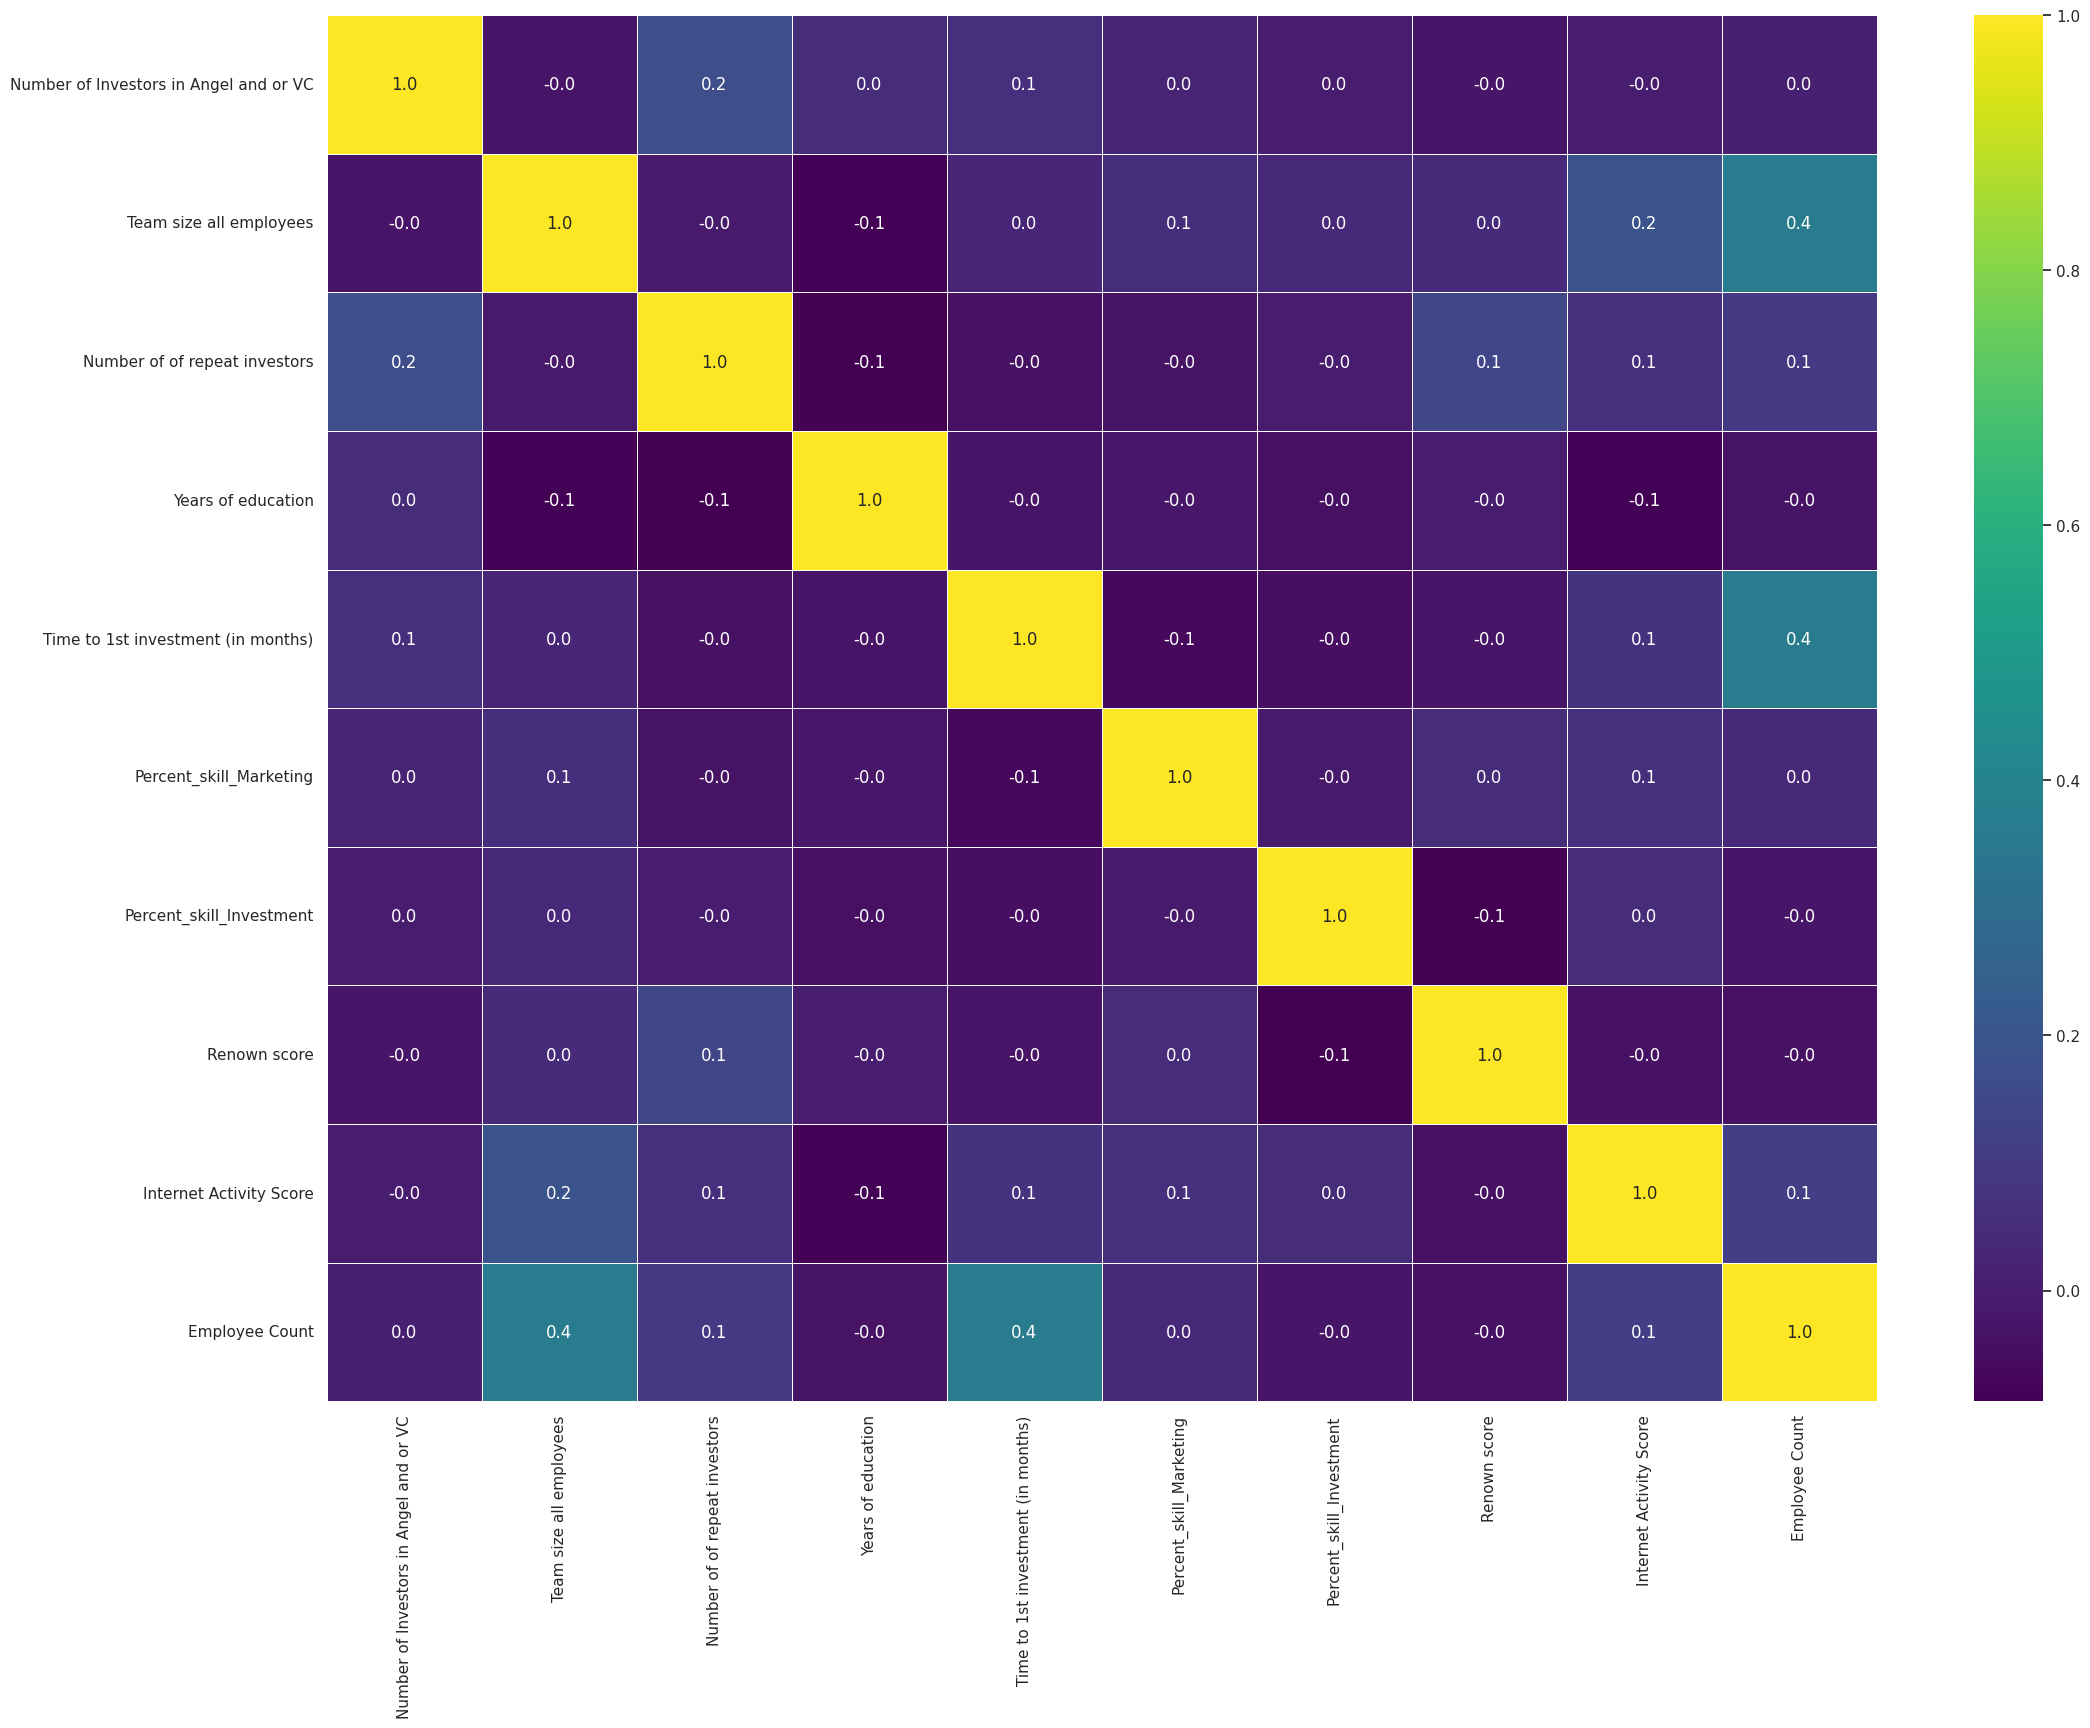

In [145]:
#correlation plot
plt.figure(figsize = (25, 18))
sns.heatmap(data[num_columns].corr(), annot = True, cmap = 'viridis', linewidth = 0.5, fmt = '.1f')

In [146]:
#Scaling column values
#columns_to_scale = ['google page rank of company website', 'Team size all employees', 'Years of education', 'Avg time to investment - average across all rounds, measured from previous investment']
scaler = MinMaxScaler()
scaler.fit(data[num_columns])  #or use columns
data[num_columns] = scaler.transform(data[num_columns])

In [147]:
data[num_columns].head()

,Age of company in years,Number of Investors in Seed,Number of Investors in Angel and or VC,Team size all employees,Number of of repeat investors,Years of education,Number of Recognitions for Founders and Co-founders,Skills score,google page rank of company website,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score,Internet Activity Score,Employee Count
0,0.000000,0.083333,0.0,0.002801,0.4,0.428571,0.000000,0.0000,0.429931,0.000000,0.0018,0.0072,0.058065,0.074103,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.320354,0.005051
1,0.176471,0.208333,0.0,0.003801,0.0,0.428571,0.021667,0.1700,0.047653,0.000000,0.0080,0.0800,0.058065,0.057692,0.158824,0.235294,0.150000,0.169231,0.0,0.110294,0.435294,0.435294,0.088235,0.0000,0.0,0.0,0.0,0.0,0.727273,0.376106,0.021886
2,0.176471,0.625000,0.0,0.001800,0.0,0.000000,0.030000,0.1800,0.003188,0.000000,0.0040,0.0376,0.006452,0.047080,0.094017,0.000000,0.574786,0.000000,0.0,0.048077,0.341880,0.376068,0.000000,0.0625,0.0,0.0,0.0,0.0,0.818182,0.522124,0.023569
3,0.294118,0.250000,0.0,0.009802,0.0,0.000000,0.003333,0.0775,0.000529,0.060606,0.0120,0.1640,0.000000,0.055769,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.454545,0.276991,0.075758
4,0.235294,0.291667,0.0,0.007802,0.0,0.000000,0.008333,0.1150,0.009013,0.000000,0.0120,0.0880,0.077419,0.062963,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.545455,0.540265,0.065657


In [148]:
#processing categorical features
data[cat_columns] = data[cat_columns].fillna('No Info')
data[cat_columns].head()

,Short Description of company profile,Industry of company,Focus functions of company,Investors,Has the team size grown,Country of company,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Number of of Research publications,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,"Survival through recession, based on existence of the company through recession times"
0,Video distribution,No Info,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kleiner Perkins Caufield & Byers|AT&T|Blueprint Ventures|Cisco|Zone Ventures,No,United States,Nothing,No,Small,No,No,No,No,Service,No,Private,No,Both,Yes,Platform,Global,Linear,Yes,None,No,No,No,No,No,No,No,No,No,Yes,Online,B2C,High,High,Yes,Low,Masters,None,Low,Low,Yes,No,High,No Info,No,No,Yes,No,No,No,No Info,No,Yes,No Info
1,No Info,Market Research|Marketing|Crowdfunding,"Marketing, sales",No Info,No,United States,medium,Yes,Large,Yes,Yes,No,No,Product,No,Public,Yes,Both,No,Platform,Local,Non-Linear,No,Few,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Online,B2C,Low,High,Yes,High,Masters,None,High,Medium,Yes,No,Low,No Info,No,Yes,Yes,No,No,Yes,Medium,Yes,Yes,Not Applicable
2,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partners|Rincon Venture Partners|Pelion Venture Partners|500 Startups|Loren Siebert|Jason Seats|XG Ventures|George Karidis|Sam Choi|Morris Wheeler|Data Collective|Pejman Nozad|Ullas Naik|Dirk Elmendorf|Galvanize|Pat Matthews|Paul Kedrosky|Matt Ocko|Cloud Power Capital|Jared Kopf|Anne Johnson|Issac Roth|George Karutz|Jim Deters|Zachary Aarons|Zack Bogue,No,United States,low,Yes,Medium,No,No,No,No,Both,Yes,Private,Yes,Both,Yes,cloud,Local,Non-Linear,No,Few,No,No,No,Yes,No,No,Yes,No,No,No,Online,B2B,Low,Medium,Yes,Low,Bachelors,None,High,Medium,Yes,No,Low,No Info,Yes,Yes,Yes,No,No,No,Low,Yes,Yes,Not Applicable
3,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keith Rabois|Andreessen Horowitz|Marc Benioff|David Sacks|Y Combinator|Voyager Capital,No,United States,low,No,Large,Yes,Yes,No,No,Product,Yes,Public,Yes,Structured,Yes,Platform,Local,Non-L

In [149]:
encoder = OneHotEncoder()
encoder.fit(data[cat_columns])
one_hot_encoded_output_train = encoder.transform(data[cat_columns])
data.drop(columns=cat_columns, axis=1, inplace=True)
encoded_df = pd.DataFrame(one_hot_encoded_output_train, columns=encoder.get_feature_names_out(cat_columns))
data = pd.concat([data, encoded_df], axis=1)

In [150]:
#check if there are issues in data or not
data_cleaning_suggestions(data)
%matplotlib inline

There are 2 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age of company in years,float64,0.000000,NA,0.000000,1.000000,Column has 6 outliers greater than upper bound (0.71) or lower than lower bound(-0.24). Cap them or remove them.
Internet Activity Score,float64,0.000000,NA,0.000000,1.000000,Column has 51 outliers greater than upper bound (0.50) or lower than lower bound(0.22). Cap them or remove them.
Employee Count,float64,0.000000,NA,0.000000,1.000000,Column has 71 outliers greater than upper bound (0.06) or lower than lower bound(-0.01). Cap them or remove them.
Number of Investors in Seed,float64,0.000000,NA,0.000000,1.000000,Column has 79 outliers greater than upper bound (0.10) or lower than lower bound(-0.06). Cap them or remove them.
Number of Investors in Angel and or VC,float64,0.000000,NA,0.000000,1.000000,Column has 100 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
Number of Co-founders,int64,0.000000,1,0.000000,7.000000,Column has 32 outliers greater than upper bound (3.50) or lower than lower bound(-0.50). Cap them or remove them.
Number of of advisors,int64,0.000000,2,0.000000,13.000000,Column has 63 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Team size Senior leadership,int64,0.000000,2,1.000000,24.000000,Column has 14 outliers greater than upper bound (9.50) or lower than lower bound(-2.50). Cap them or remove them.
Team size all employees,float64,0.000000,NA,0.000000,1.000000,Column has 31 outliers greater than upper bound (0.02) or lower than lower bound(-0.01). Cap them or remove them.
Number of of repeat investors,float64,0.000000,NA,0.000000,1.000000,Column has 37 outliers greater than upper bound (0.25) or lower than lower bound(-0.15). Cap them or remove them.


In [151]:
#cap outliers
cols_with_outliers = ['Number of Co-founders', 'Number of of advisors', 'Team size Senior leadership']

def cap_outliers(col):
  std_deviation = 2
  mean = data[col].mean()
  std = data[col].std()

  upper_threshold = mean + (std_deviation * std)
  lower_threshold = mean - (std_deviation * std)
  data[col] = data[col].clip(lower=lower_threshold, upper=upper_threshold)

for col in cols_with_outliers:
  cap_outliers(col)

## Model Training and Predicting

In [152]:
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size= 0.25, random_state = 42)

In [153]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train.shape, y_train.shape

((354, 1243), (354, 2))

In [154]:
model = Sequential()

model.add(Dense(units=35,activation='relu',kernel_initializer='GlorotNormal'))
model.add(Dense(units=100,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=150,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=200,activation='relu',kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.FalseNegatives()])

In [155]:
model.fit(x = x_train, y = y_train, epochs = 150, validation_split=0.1)

Epoch 1/150
10/10 [==============================] - 6s 128ms/step - loss: 0.8014 - binary_accuracy: 0.5503 - false_negatives_3: 143.0000 - val_loss: 0.6318 - val_binary_accuracy: 0.8333 - val_false_negatives_3: 6.0000
Epoch 2/150
10/10 [==============================] - 0s 12ms/step - loss: 0.5645 - binary_accuracy: 0.7736 - false_negatives_3: 72.0000 - val_loss: 0.5547 - val_binary_accuracy: 0.8889 - val_false_negatives_3: 4.0000
Epoch 3/150
10/10 [==============================] - 0s 14ms/step - loss: 0.4428 - binary_accuracy: 0.8302 - false_negatives_3: 54.0000 - val_loss: 0.4770 - val_binary_accuracy: 0.8889 - val_false_negatives_3: 4.0000
Epoch 4/150
10/10 [==============================] - 0s 13ms/step - loss: 0.3457 - binary_accuracy: 0.8742 - false_negatives_3: 40.0000 - val_loss: 0.4098 - val_binary_accuracy: 0.8889 - val_false_negatives_3: 4.0000
Epoch 5/150
10/10 [==============================] - 0s 9ms/step - loss: 0.2384 - binary_accuracy: 0.9403 - false_negatives_3: 19.

<Axes: >

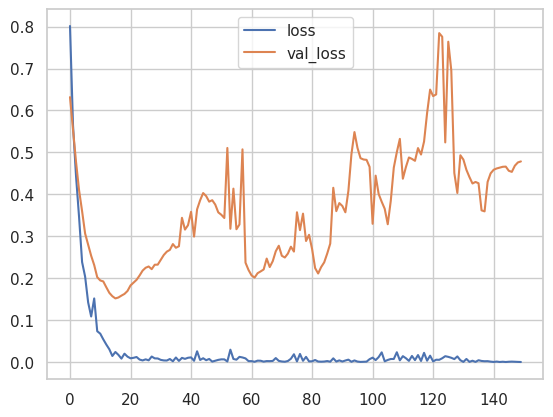

In [156]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

<Axes: >

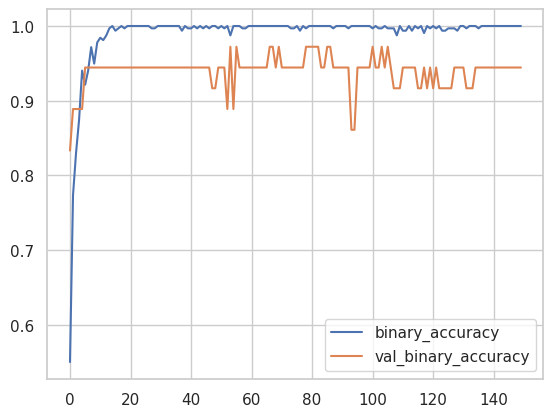

In [157]:
pd.DataFrame(model.history.history)[['binary_accuracy','val_binary_accuracy']].plot()

In [158]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.7497 - binary_accuracy: 0.9068 - false_negatives_3: 11.0000


[0.7496803998947144, 0.9067796468734741, 11.0]

In [159]:
ypred= np.where(model.predict(x_test) > 0.5, 1, 0)
ypred

4/4 [==============================] - 0s 8ms/step


array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1,

In [160]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.83      0.90      0.86        39

   micro avg       0.91      0.91      0.91       118
   macro avg       0.89      0.90      0.90       118
weighted avg       0.91      0.91      0.91       118
 samples avg       0.91      0.91      0.91       118



In [161]:
confusion_matrix(y_test[:, 0], ypred[:, 0])

array([[35,  4],
       [ 7, 72]])

In [162]:
tn, fp, fn, tp = confusion_matrix(y_test[:, 0], ypred[:, 0]).ravel()
(tn, fp, fn, tp)

(35, 4, 7, 72)

In [163]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ypred, y_test)

0.09322033898305085